# **Estandarizacion**

In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_estandarizacion as fe

In [2]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers.pkl").reset_index(drop=True)
print(df.shape)
df.head()

(1520, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.304854,0.311974,0.228479,51,0,0.710032,0.303560,6,2,0.416181,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.304854,0.187055,0.100324,31,1,0.188350,0.655016,10,1,0.416181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.192880,0.187055,0.053074,32,0,0.188350,0.655016,17,4,0.056958,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.296440,0.311974,0.596117,38,0,0.101618,0.655016,2,5,0.416181,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.296440,0.192233,0.596117,32,0,0.710032,0.655016,10,1,0.311974,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]

df_sin_vr = df.copy()
df_sin_vr.drop(columns=["Attrition"], inplace=True)

df_estand, dic_scaler = fe.estandarizacion(df_sin_vr, df_sin_vr.columns, modelos_estand)
df_estand.head()

df_estand["Attrition"] = df["Attrition"]

df_estand

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_standar,JobSatisfaction_standar,WorkLifeBalance_standar,Age_standar,BusinessTravel_standar,Department_standar,DistanceFromHome_standar,Education_standar,EducationField_standar,JobLevel_standar,MaritalStatus_standar,MonthlyIncome_standar,NumCompaniesWorked_standar,PercentSalaryHike_standar,StockOptionLevel_standar,TotalWorkingYears_standar,TrainingTimesLastYear_standar,YearsAtCompany_standar,YearsSinceLastPromotion_standar,YearsWithCurrManager_standar,JobInvolvement_standar,PerformanceRating_standar,Gender_Female_standar,Gender_Male_standar,JobRole_Healthcare Representative_standar,JobRole_Human Resources_standar,JobRole_Laboratory Technician_standar,JobRole_Manager_standar,JobRole_Manufacturing Director_standar,JobRole_Research Director_standar,JobRole_Research Scientist_standar,JobRole_Sales Executive_standar,JobRole_Sales Representative_standar,EnvironmentSatisfaction_robust,JobSatisfaction_robust,WorkLifeBalance_robust,Age_robust,BusinessTravel_robust,Department_robust,DistanceFromHome_robust,Education_robust,EducationField_robust,JobLevel_robust,MaritalStatus_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,StockOptionLevel_robust,TotalWorkingYears_robust,TrainingTimesLastYear_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,JobInvolvement_robust,PerformanceRating_robust,Gender_Female_robust,Gender_Male_robust,JobRole_Healthcare Representative_robust,JobRole_Human Resources_robust,JobRole_Laboratory Technician_robust,JobRole_Manager_robust,JobRole_Manufacturing Director_robust,JobRole_Research Director_robust,JobRole_Research Scientist_robust,JobRole_Sales Executive_robust,JobRole_Sales Representative_robust,EnvironmentSatisfaction_minmax,JobSatisfaction_minmax,WorkLifeBalance_minmax,Age_minmax,BusinessTravel_minmax,Department_minmax,DistanceFromHome_minmax,Education_minmax,EducationField_minmax,JobLevel_minmax,MaritalStatus_minmax,MonthlyIncome_minmax,NumCompaniesWorked_minmax,PercentSalaryHike_minmax,StockOptionLevel_minmax,TotalWorkingYears_minmax,TrainingTimesLastYear_minmax,YearsAtCompany_minmax,YearsSinceLastPromotion_minmax,YearsWithCurrManager_minmax,JobInvolvement_minmax,PerformanceRating_minmax,Gender_Female_minmax,Gender_Male_minmax,JobRole_Healthcare Representative_minmax,JobRole_Human Resources_minmax,JobRole_Laboratory Technician_minmax,JobRole_Manager_minmax,JobRole_Manufacturing Director_minmax,JobRole_Research Director_minmax,JobRole_Research Scientist_minmax,JobRole_Sales Executive_minmax,JobRole_Sales Representative_minmax,Attrition
0,0.304854,0.311974,0.228479,51,0.710032,0.303560,6,2,0.416181,1,0.458252,131160,1.0,11,0,1.0,6,1,0,0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832246,0.872262,-0.885953,1.594009,0.635783,-1.156410,-0.386022,-0.887518,0.903633,-0.958019,1.015509,1.408031,-0.675297,-1.150936,-0.927419,-1.348572,2.484585,-1.022672,-0.692787,-1.152587,0.375391,-0.423330,1.241695,-1.241695,3.127322,-0.191924,-0.461615,-0.266790,-0.330891,-0.238796,-0.495885,-0.536783,-0.243379,0.075145,0.124324,-1.000000,1.333333,0.000000,-1.0,-0.083333,-0.5,0.336820,-0.5,1.000000,1.507414,-0.333333,-0.500000,-1.0,-0.944444,3.0,-0.666667,-0.5,-0.6,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.359639,0.785714,1.000000,0.427215,0.178571,0.25,1.000000,0.00,1.000000,0.637546,0.111111

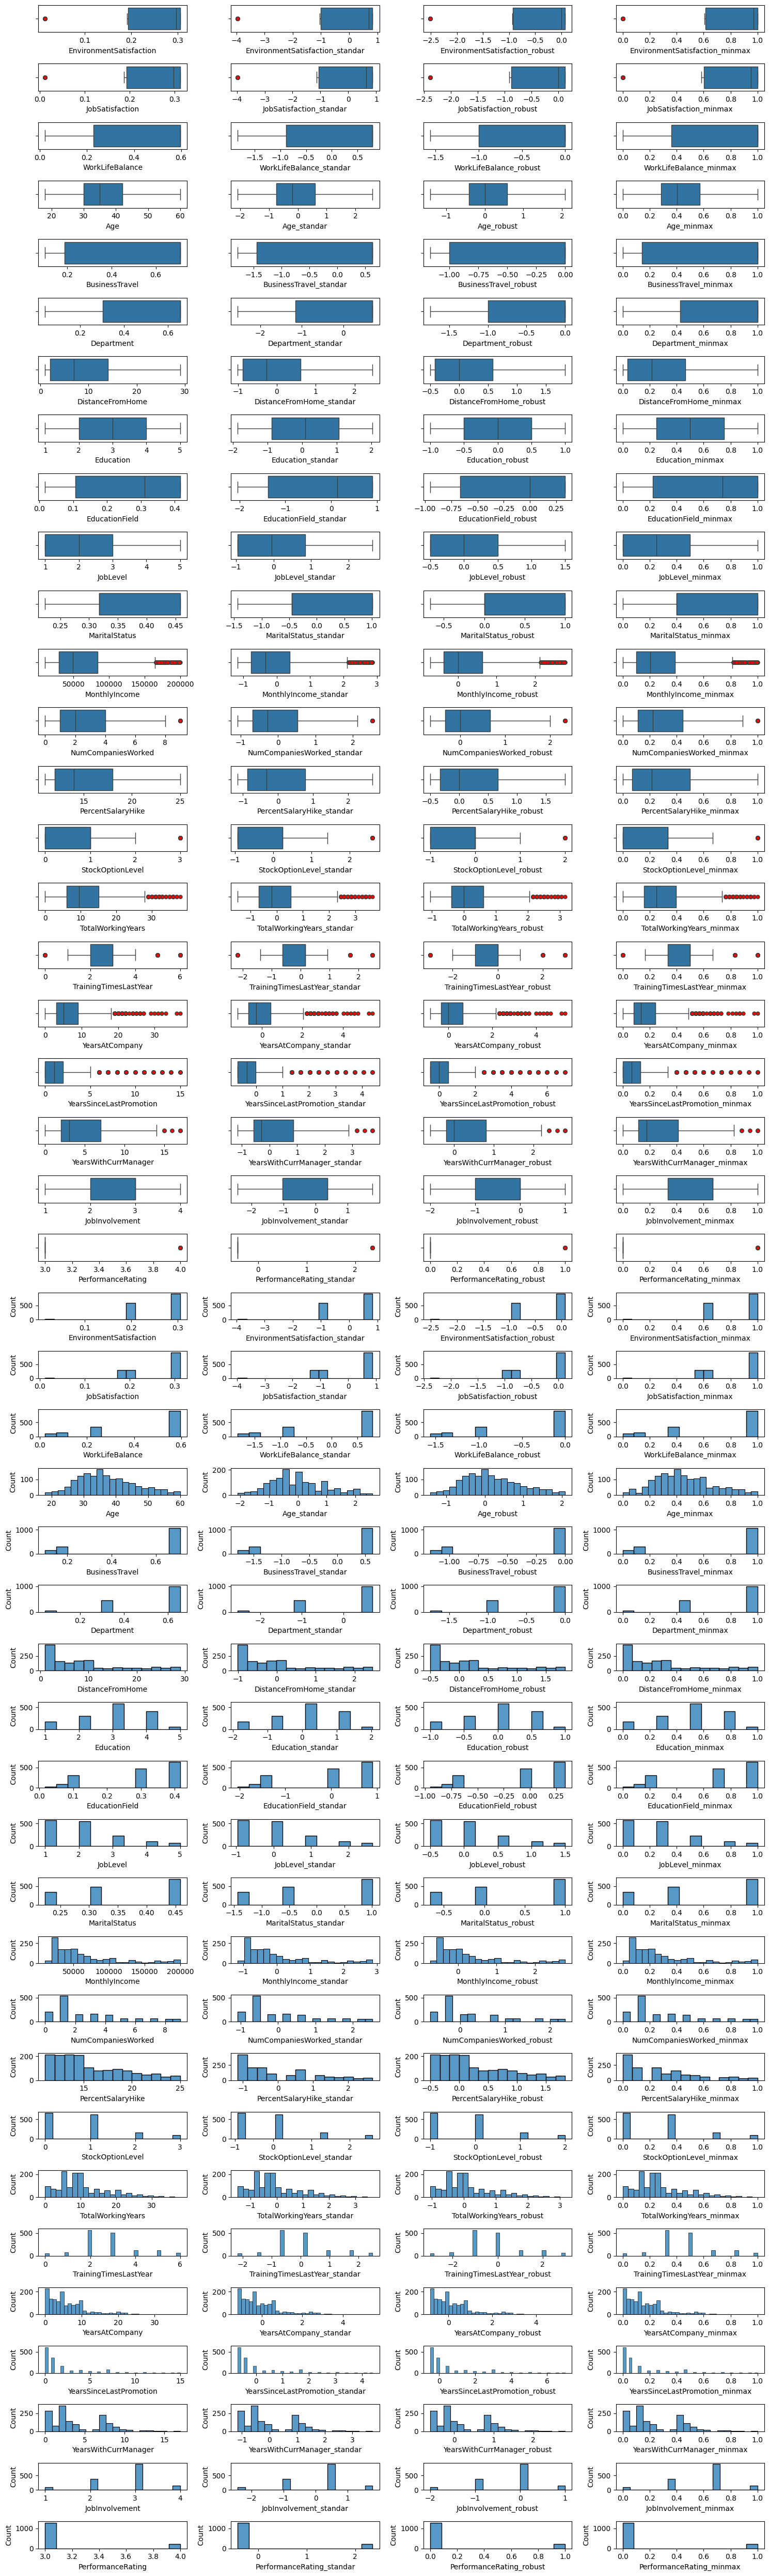

In [4]:
columnas = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "Age", "BusinessTravel", "Department", "DistanceFromHome", "Education", "EducationField", "JobLevel", "MaritalStatus", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "JobInvolvement", "PerformanceRating"]
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand, figsize=(15,50))

en base a la gráfica observando los distintos histplot vemos que la que mejor mantiene las distribuciones es el robust, por lo que será la que aplicaremos.

In [5]:
scaler="robust"
vr = "Attrition"

df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=False)]

## Mover la columna de la variable respuesta al principio
df_scaled = df_scaled[[vr] + [col for col in df_scaled.columns if col != vr]]
df_scaled.columns = df_scaled.columns.str.replace("_robust", "", regex=False)

df_scaled.head(2)

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0.075145,0.124324,-1.000000,1.333333,0.0,-1.0,-0.083333,-0.5,0.33682,-0.5,1.0,1.507414,-0.333333,-0.5,-1.0,-0.944444,3.0,-0.666667,-0.5,-0.6,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.075145,-0.918919,-1.348592,-0.333333,-1.0,0.0,0.250000,-1.0,0.33682,-0.5,0.0,-0.131846,-0.666667,1.5,0.0,-0.388889,0.0,0.000000,0.0,0.2,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
df_scaled.shape

(1520, 34)

In [7]:
with open('../datos/preprocesamiento/robust_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler["robust"], f)

df_scaled.to_pickle("../datos/dataframes/df_nonulls_encoded_outliers_scaled.pkl")